# Melbourne Housing Market Analysis & ML Prediction

## Introduction

* Melbourne is the capital and largest city of the Australian state of Victoria, and the second-most populous city in both Australia and Oceania.
* The dataset contains several attributes of the houses in Melbourne along with their prices.
* We will estimate the price of a house using the Melbourne Housing dataset, which is a real-life example.

<p align="center">
  <img src="https://www.smartpropertyinvestment.com.au/images/intro-images/839x487/melbourne-twilight-spi.jpg" alt="MelboruneImage">
<p align="center">Melbourne City</p>

## Analysis Content

<font color = 'blue'>
Content:

1. [Python Libraries](#1)
2. [Data Content](#2)
3. [Gathering and Observing Data](#3)
4. [Exploratory Data Analysis](#4)
  * [Missing Values](#5)
  * [Duplicated Data And Deletion](#6)
  * [Unique Value Analysis](#7)
  * [Categroical And Numeric Lists](#8)
  * [Outlier Detection](#9)
    * [Outlier Detection with Z-Score](#10)
    * [Missing Value Analysis](#11)
  * [Data Visiualization](#12)
    * [Histogram to Visualize Price Distribution](#13)
    * [The Relationship Between All Numerical Variables and The Price Variable](#14)
    * [Correlation Matrix](#15)
    * [Label Encoder and One Hot Encoder](#16)
      * [Label Encoder](#17)
      * [One Hot Encoder](#18)
5. [Model Selection](#19)
  * [Splittin and Determine](#20)
  * [Train Models](#21)  
6. [Model Evaluation](#22)      

<a id = '1'></a><br>
## Python Libraries

* In this section, we import used libraries during this kernel.

In [49]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

<a id = '2'></a><br>
## Data Content

The variables in the data set:

* Suburb
* Address
* Rooms: Number of rooms
* Price: Price in Australian dollars, target variable
* Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed;
SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after
auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
* Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site -
development site; o res - other residential.
* SellerG: Real Estate Agent
* Date: Date sold
* Distance: Distance from CBD in Kilometres
* Regionname: General Region (West, North West, North, North east ...etc)
* Propertycount: Number of properties that exist in the suburb.
* Bedroom2 : Scraped # of Bedrooms (from different source)
* Bathroom: Number of Bathrooms
* Car: Number of carspots
* Landsize: Land Size in Metres
* BuildingArea: Building Size in Metres
* YearBuilt: Year the house was built
* CouncilArea: Governing council for the area
* Lattitude
* Longtitude

<a id = '3'></a><br>
## Gathering and Observing Data

* Load the dataset to the project

In [50]:
#connect to drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [51]:
# We may need to see which directory we are in
!pwd

/content


In [148]:
# read data
df_orig = pd.read_csv("/content/gdrive/MyDrive/Colab_Notebooks/Melbourne_Housing_Market/data/Melbourne_housing_FULL.csv")
df = df_orig.copy()
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


* Positioning of Hausing in Australia and Melbourne

<ipython-input-149-9dda3debc5a8>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


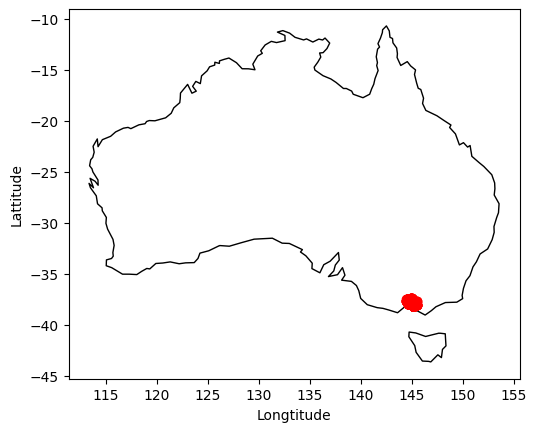

In [149]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'Australia'].plot(
    color='white', edgecolor='black')

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longtitude, df.Lattitude))
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlabel('Longtitude')
ax.set_ylabel('Lattitude')
gdf.plot(ax=ax, color='red')

plt.show()

<ipython-input-150-726c9babbdc4>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


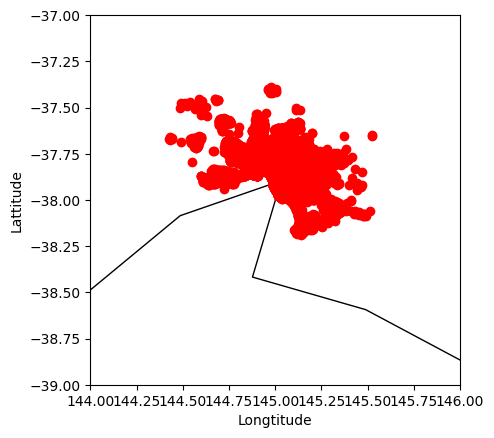

In [150]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'Australia'].plot(
    color='white', edgecolor='black')

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longtitude, df.Lattitude))
ax.set_xlim(144, 146)
ax.set_ylim(-39, -37)
ax.set_xlabel('Longtitude')
ax.set_ylabel('Lattitude')
gdf.plot(ax=ax, color='red')

plt.show()

In [151]:
# information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [152]:
# describe basic statistics of data
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [153]:
print(f'Shape     : {df.shape}\n'
      f'Size      : {df.size}\n'
      f'Dimension : {df.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


<a id = '4'></a><br>
## Exploratory Data Analysis

<a id = '5'></a><br>
### Missing Values

* Percentage of missing values

In [154]:
df.isnull().sum() / len(df) * 100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

* Sum of missing values

In [155]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

<a id = '6'></a><br>
### Duplicated data and deletion

In [156]:
df.duplicated().sum()

1

In [157]:
df.loc[df.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


<a id = '7'></a><br>
### Unique Value Analysis

In [158]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [159]:
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

Suburb -- 351
Address -- 34009
Rooms -- 12
Type -- 3
Price -- 2871
Method -- 9
SellerG -- 388
Date -- 78
Distance -- 215
Postcode -- 211
Bedroom2 -- 15
Bathroom -- 11
Car -- 15
Landsize -- 1684
BuildingArea -- 740
YearBuilt -- 160
CouncilArea -- 33
Lattitude -- 13402
Longtitude -- 14524
Regionname -- 8
Propertycount -- 342


<a id = '8'></a><br>
### Categorical and Numeric Lists

* **First of all, Date column is defined as an object. Let's edit this date column as a date. Afterwards, let's create the sales year column and delete the Date column.**

In [160]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-160-b9c6864122be>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [161]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 34857 entries, 0 to 34856
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
34857 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 272.4 KB


In [162]:
df['SaleYear'] = df['Date'].dt.year

In [163]:
df['SaleYear']

0        2016
1        2016
2        2016
3        2016
4        2017
         ... 
34852    2018
34853    2018
34854    2018
34855    2018
34856    2018
Name: SaleYear, Length: 34857, dtype: int64

In [164]:
df.drop(['Date'], axis='columns', inplace=True)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom2       26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13742 non-null  float64
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Lattitude      26881 non-null  float64
 17  Longtitude     26881 non-null  float64
 18  Region

In [166]:
df['SaleYear'].value_counts().shape[0]

3

* **Creating categorical and numerical lists.**

In [167]:
categorical_list = ['Type','Method', 'Regionname','SellerG', 'CouncilArea', 'Postcode']
numeric_list = ['Rooms', 'Distance', 'Bathroom', 'Bedroom2', 'Car', 'Landsize', 'BuildingArea']
target = ['Price']

<a id = '9'></a><br>
### Outlier Detection

In [168]:
df_cat = df[categorical_list]
df_num = df[numeric_list]

y = df[target]

df_cat

,Type,Method,Regionname,SellerG,CouncilArea,Postcode
0,h,SS,Northern Metropolitan,Jellis,Yarra City Council,3067.0
1,h,S,Northern Metropolitan,Biggin,Yarra City Council,3067.0
2,h,S,Northern Metropolitan,Biggin,Yarra City Council,3067.0
3,u,VB,Northern Metropolitan,Rounds,Yarra City Council,3067.0
4,h,SP,Northern Metropolitan,Biggin,Yarra City Council,3067.0
...,...,...,...,...,...,...
34852,h,PI,Western Metropolitan,Jas,Maribyrnong City Council,3013.0
34853,h,SP,Western Metropolitan,Sweeney,Maribyrnong City Council,3013.0
34854,t,S,Western Metropolitan,Jas,Maribyrnong City Council,3013.0
34855,h,SP,Western Metropolitan,hockingstuart,Maribyrnong City Council,3013.0


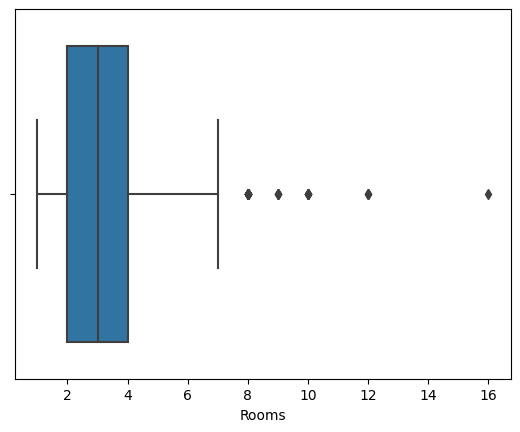

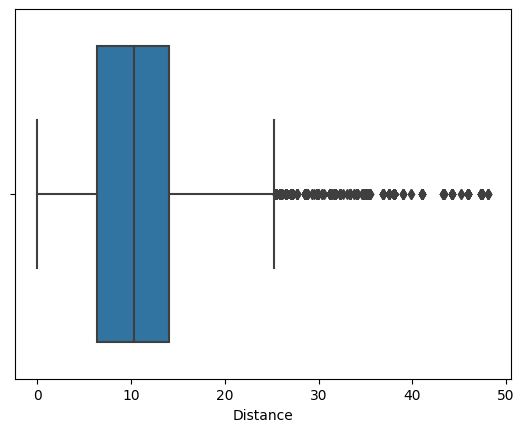

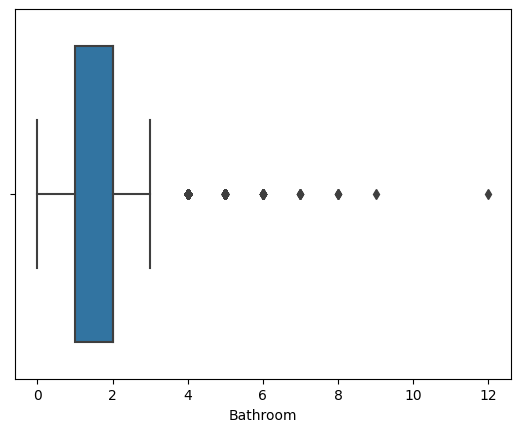

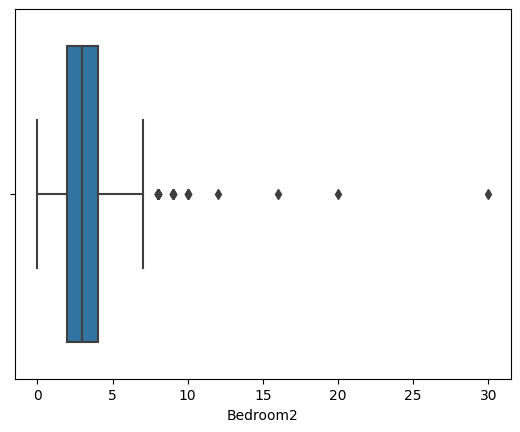

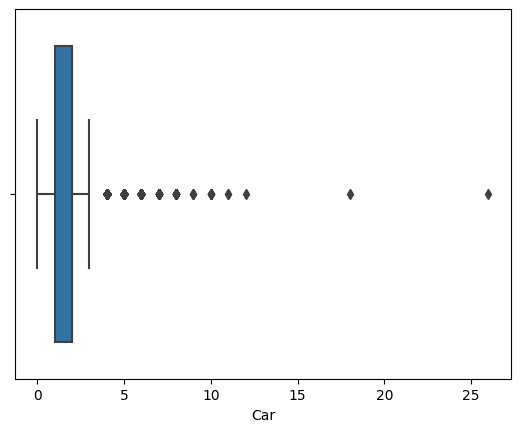

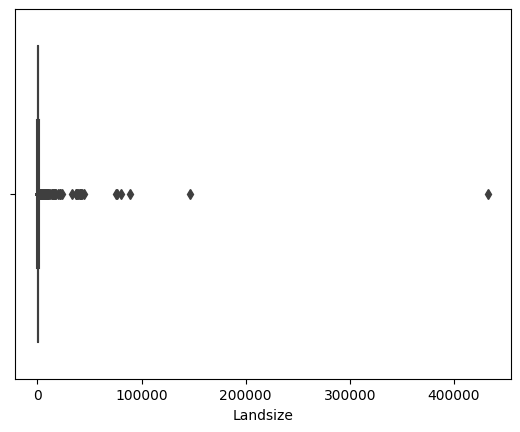

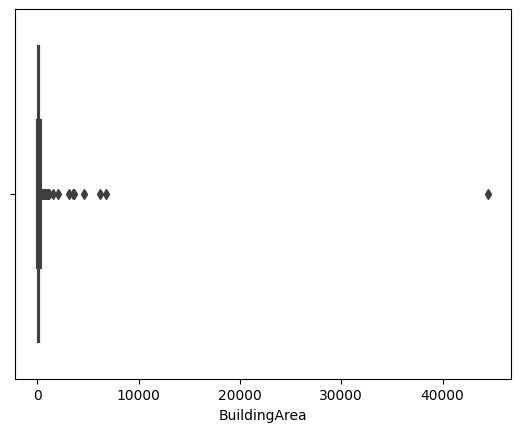

In [169]:
for i in df_num.columns:
  sns.boxplot(data = df_num, x=i)
  plt.show()

In [170]:
df['SoldAge'] = df['SaleYear'] - df['YearBuilt']
df.drop(df.loc[df["SoldAge"]<0].index, inplace=True)
df = df.drop(df[df['BuildingArea'] > df['Landsize']].index)

In [171]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,SaleYear,SoldAge
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2.5,3067.0,2.0,...,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2016,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,...,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016,NaN
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,...,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016,116.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2.5,3067.0,3.0,...,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,2016,NaN
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,...,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,2017,NaN


In [172]:
df = df.drop(['YearBuilt'], axis = 1)

In [173]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,SaleYear,SoldAge
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2.5,3067.0,2.0,...,1.0,126.0,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2016,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,...,1.0,202.0,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016,NaN
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,...,0.0,156.0,79.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016,116.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2.5,3067.0,3.0,...,1.0,0.0,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,2016,NaN
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,...,1.0,94.0,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,2017,NaN


<a id = '10'></a><br>
#### Outliers Detection with Z-score

Z score is an important concept in statistics. Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.

**Z score = (x -mean) / std. deviation**

* A normal distribution is shown below and it is estimated that
* 68% of the data points lie between +/- 1 standard deviation.
* 95% of the data points lie between +/- 2 standard deviation
* 99.7% of the data points lie between +/- 3 standard deviation
<p align="center">
  <img src="https://media.geeksforgeeks.org/wp-content/uploads/20200428193707/image-111-1.png" alt="z-score">
<p align="center">Z score for Outlier Detection</p>
<p align="center">(www.geeksforgeeks.org)</p>

In [174]:
numerical_columns = df.select_dtypes("float64", "int64").columns

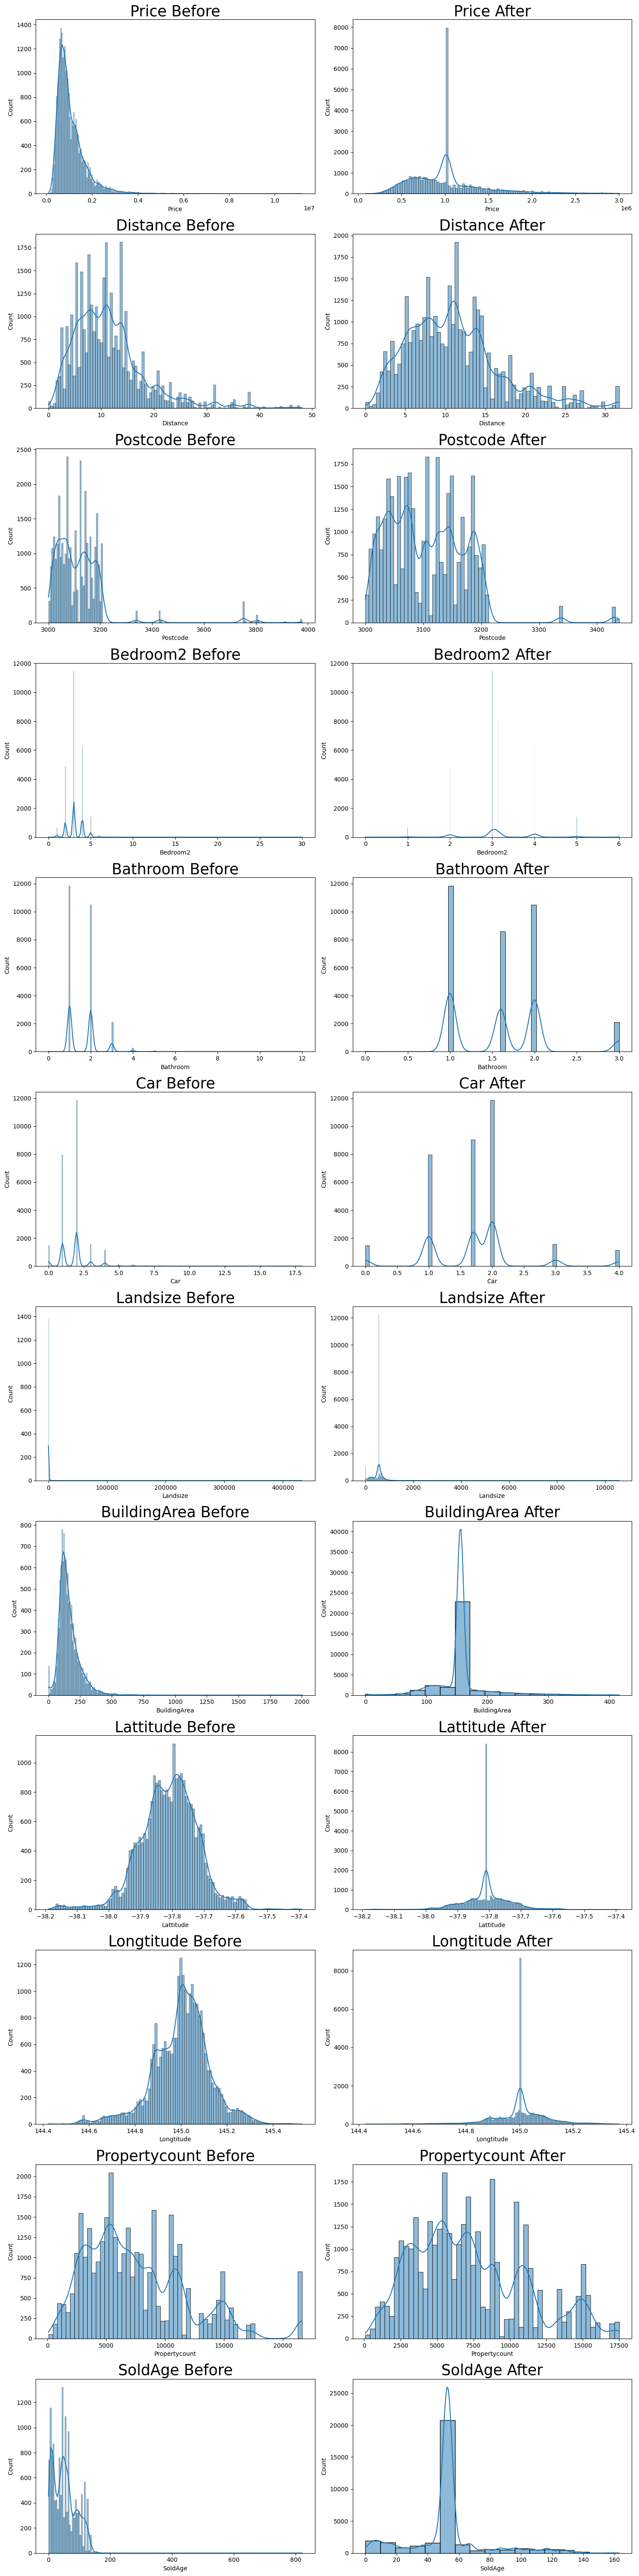

In [175]:
num_rows = len(numerical_columns)
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

counter = 0
for column in numerical_columns:
    sns.histplot(df[column], ax=axes[counter, 0], kde=True)

    max_value = (3 * df[column].std()) + df[column].mean()
    min_value = -((3 * df[column].std()) + df[column].mean())

    mean = df.loc[(df[column] > min_value) & (df[column] < max_value), column].mean()
    if not np.isnan(mean):
        df.loc[(df[column] < min_value) | (df[column] > max_value), column] = mean
        df[column].fillna(mean, inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

    sns.histplot(df[column], ax=axes[counter, 1], kde=True)
    axes[counter, 0].set_title(f"{column} Before", fontsize=25)
    axes[counter, 1].set_title(f"{column} After", fontsize=25)
    counter += 1

plt.tight_layout()

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33097 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         33097 non-null  object 
 1   Address        33097 non-null  object 
 2   Rooms          33097 non-null  int64  
 3   Type           33097 non-null  object 
 4   Price          33097 non-null  float64
 5   Method         33097 non-null  object 
 6   SellerG        33097 non-null  object 
 7   Distance       33097 non-null  float64
 8   Postcode       33097 non-null  float64
 9   Bedroom2       33097 non-null  float64
 10  Bathroom       33097 non-null  float64
 11  Car            33097 non-null  float64
 12  Landsize       33097 non-null  float64
 13  BuildingArea   33097 non-null  float64
 14  CouncilArea    33094 non-null  object 
 15  Lattitude      33097 non-null  float64
 16  Longtitude     33097 non-null  float64
 17  Regionname     33094 non-null  object 
 18  Proper

In [177]:
df.shape

(33097, 21)

<a id = '11'></a><br>
#### Missing Value Analysis

In [178]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      3
Lattitude        0
Longtitude       0
Regionname       3
Propertycount    0
SaleYear         0
SoldAge          0
dtype: int64

In [179]:
for column in df_cat:
    df[column] = df[column].fillna(df[column].mode().iloc[0])

In [180]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
SaleYear         0
SoldAge          0
dtype: int64

<a id = '12'></a><br>
### Data Visualization

<a id = '13'></a><br>
#### Histogram to Visualize Price Distribution

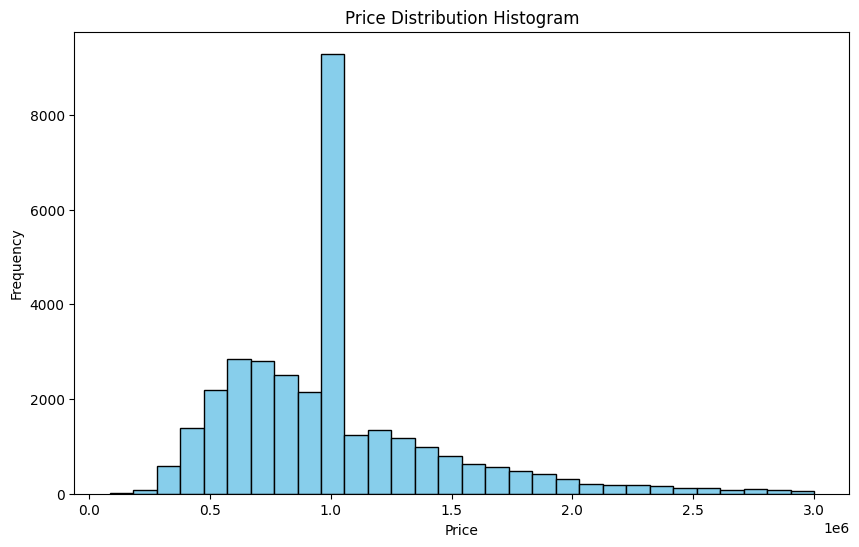

In [181]:
plt.figure(figsize=(10, 6))

plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')

# Set labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution Histogram')

plt.show()

<a id = '14'></a><br>
#### The Relationship Between All Numerical Variables and The Price Variable

<Figure size 3000x4000 with 0 Axes>

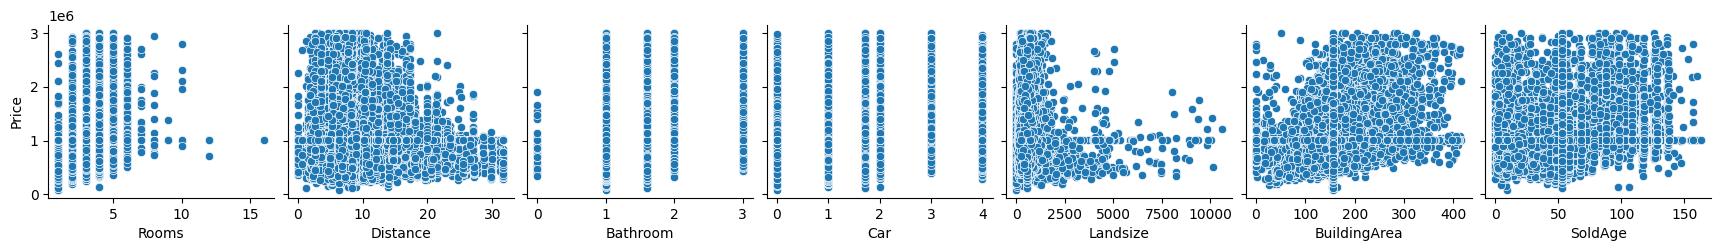

In [182]:
plt.figure(figsize=(30, 40))
sns.pairplot(
    data=df,
    x_vars=['Rooms','Distance','Bathroom','Car','Landsize','BuildingArea','SoldAge'],
    y_vars=['Price'],
)
plt.show()

<a id = '15'></a><br>
#### Correlation Matrix

<ipython-input-183-a30fd87be87a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='PuBuGn', linewidths=.5)


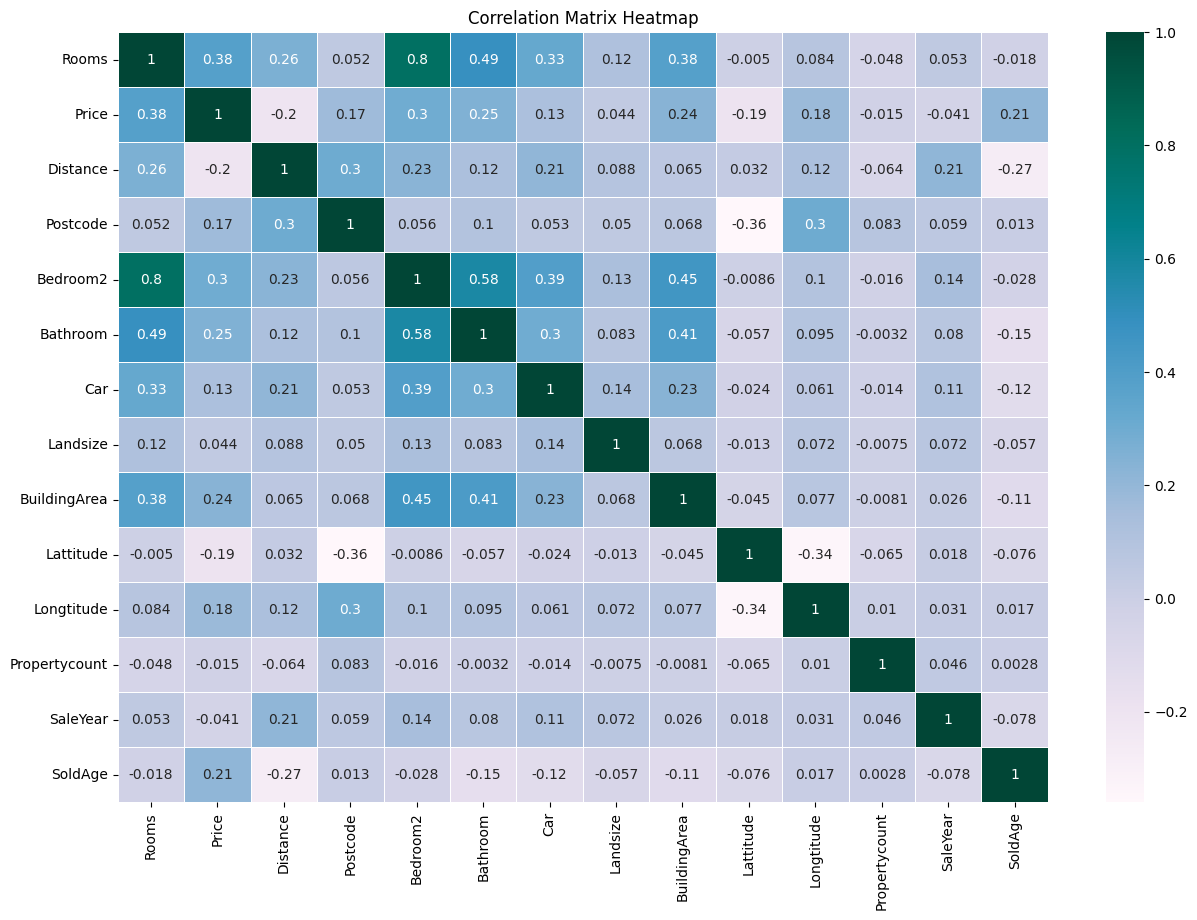

In [183]:
plt.figure(figsize=(15, 10))

sns.heatmap(df.corr(), annot=True, cmap='PuBuGn', linewidths=.5)
plt.title('Correlation Matrix Heatmap')

plt.show()

<a id = '16'></a><br>
####  Label Encoder and One Hot encoder

In [184]:
#object_columns = df.select_dtypes("object").columns

In [185]:
#for colname in object_columns:
#    df[colname] = df[colname].astype('category')

#df.info()

In [186]:
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

Suburb -- 351
Address -- 32298
Rooms -- 12
Type -- 3
Price -- 2617
Method -- 9
SellerG -- 385
Distance -- 190
Postcode -- 184
Bedroom2 -- 8
Bathroom -- 5
Car -- 6
Landsize -- 1646
BuildingArea -- 557
CouncilArea -- 33
Lattitude -- 13184
Longtitude -- 14241
Regionname -- 8
Propertycount -- 342
SaleYear -- 3
SoldAge -- 155


In [187]:
df = df.drop(['Address'], axis = 1)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33097 entries, 0 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         33097 non-null  object 
 1   Rooms          33097 non-null  int64  
 2   Type           33097 non-null  object 
 3   Price          33097 non-null  float64
 4   Method         33097 non-null  object 
 5   SellerG        33097 non-null  object 
 6   Distance       33097 non-null  float64
 7   Postcode       33097 non-null  float64
 8   Bedroom2       33097 non-null  float64
 9   Bathroom       33097 non-null  float64
 10  Car            33097 non-null  float64
 11  Landsize       33097 non-null  float64
 12  BuildingArea   33097 non-null  float64
 13  CouncilArea    33097 non-null  object 
 14  Lattitude      33097 non-null  float64
 15  Longtitude     33097 non-null  float64
 16  Regionname     33097 non-null  object 
 17  Propertycount  33097 non-null  float64
 18  SaleYe

In [190]:
LEnc = ['Suburb','SellerG']
OHEnc= ['Type','Method','CouncilArea','Regionname']

In [193]:
df_Lenc = df[LEnc]
df_OHenc = df[OHEnc]

df_OHenc.head()

,Type,Method,CouncilArea,Regionname
0,h,SS,Yarra City Council,Northern Metropolitan
1,h,S,Yarra City Council,Northern Metropolitan
2,h,S,Yarra City Council,Northern Metropolitan
3,u,VB,Yarra City Council,Northern Metropolitan
5,h,PI,Yarra City Council,Northern Metropolitan


In [194]:
df_Lenc.head()

,Suburb,SellerG
0,Abbotsford,Jellis
1,Abbotsford,Biggin
2,Abbotsford,Biggin
3,Abbotsford,Rounds
5,Abbotsford,Biggin


<a id = '17'></a><br>
#####  Label Encoder

In [195]:
df_Lenc['Suburb_Label'] = pd.factorize(df['Suburb'])[0]

<ipython-input-195-703f881e70ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Lenc['Suburb_Label'] = pd.factorize(df['Suburb'])[0]


In [196]:
df_Lenc.head()

,Suburb,SellerG,Suburb_Label
0,Abbotsford,Jellis,0
1,Abbotsford,Biggin,0
2,Abbotsford,Biggin,0
3,Abbotsford,Rounds,0
5,Abbotsford,Biggin,0


In [197]:
df_Lenc['SellerG_Label'] = pd.factorize(df['SellerG'])[0]

<ipython-input-197-bae76efcd21a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Lenc['SellerG_Label'] = pd.factorize(df['SellerG'])[0]


In [198]:
df_Lenc.head()

,Suburb,SellerG,Suburb_Label,SellerG_Label
0,Abbotsford,Jellis,0,0
1,Abbotsford,Biggin,0,1
2,Abbotsford,Biggin,0,1
3,Abbotsford,Rounds,0,2
5,Abbotsford,Biggin,0,1


In [200]:
df_Lenc.drop(['Suburb','SellerG'], axis = 1, inplace = True)
df_Lenc.head()

<ipython-input-200-428959656999>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Lenc.drop(['Suburb','SellerG'], axis = 1, inplace = True)


,Suburb_Label,SellerG_Label
0,0,0
1,0,1
2,0,1
3,0,2
5,0,1


<a id = '18'></a><br>
#####  One Hot encoder

In [201]:
df_OHEnc1 = pd.get_dummies(data =df_OHenc, drop_first= True)
df_OHEnc1

,Type_t,Type_u,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34854,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34855,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [202]:
df.drop(['Type','Method','CouncilArea','Regionname','Suburb','SellerG'], axis = 1, inplace = True)
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,SaleYear,SoldAge
0,2,1.015873e+06,2.5,3067.0,2.0,1.0,1.0,126.0,155.87859,-37.8014,144.9958,4019.0,2016,52.687545
1,2,1.480000e+06,2.5,3067.0,2.0,1.0,1.0,202.0,155.87859,-37.7996,144.9984,4019.0,2016,52.687545
2,2,1.035000e+06,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,-37.8079,144.9934,4019.0,2016,116.000000
3,3,1.015873e+06,2.5,3067.0,3.0,2.0,1.0,0.0,155.87859,-37.8114,145.0116,4019.0,2016,52.687545
5,3,8.500000e+05,2.5,3067.0,3.0,2.0,1.0,94.0,155.87859,-37.7969,144.9969,4019.0,2017,52.687545


In [204]:
df = df.join(df_OHEnc1)
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1.015873e+06,2.5,3067.0,2.0,1.0,1.0,126.0,155.87859,-37.8014,...,0,1,0,0,1,0,0,0,0,0
1,2,1.480000e+06,2.5,3067.0,2.0,1.0,1.0,202.0,155.87859,-37.7996,...,0,1,0,0,1,0,0,0,0,0
2,2,1.035000e+06,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,-37.8079,...,0,1,0,0,1,0,0,0,0,0
3,3,1.015873e+06,2.5,3067.0,3.0,2.0,1.0,0.0,155.87859,-37.8114,...,0,1,0,0,1,0,0,0,0,0
5,3,8.500000e+05,2.5,3067.0,3.0,2.0,1.0,94.0,155.87859,-37.7969,...,0,1,0,0,1,0,0,0,0,0


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33097 entries, 0 to 34856
Data columns (total 65 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Rooms                                       33097 non-null  int64  
 1   Price                                       33097 non-null  float64
 2   Distance                                    33097 non-null  float64
 3   Postcode                                    33097 non-null  float64
 4   Bedroom2                                    33097 non-null  float64
 5   Bathroom                                    33097 non-null  float64
 6   Car                                         33097 non-null  float64
 7   Landsize                                    33097 non-null  float64
 8   BuildingArea                                33097 non-null  float64
 9   Lattitude                                   33097 non-null  float64
 10  Longtitude

<a id = '19'></a><br>
## Model Selection

<a id = '20'></a><br>
### Splitting and Determine

In [214]:
X = df.loc[:, df.columns != 'Price']

In [215]:
X.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Suburb_Label,SellerG_Label
0,2,2.5,3067.0,2.0,1.0,1.0,126.0,155.87859,-37.8014,144.9958,...,0,0,1,0,0,0,0,0,0,0
1,2,2.5,3067.0,2.0,1.0,1.0,202.0,155.87859,-37.7996,144.9984,...,0,0,1,0,0,0,0,0,0,1
2,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,-37.8079,144.9934,...,0,0,1,0,0,0,0,0,0,1
3,3,2.5,3067.0,3.0,2.0,1.0,0.0,155.87859,-37.8114,145.0116,...,0,0,1,0,0,0,0,0,0,2
5,3,2.5,3067.0,3.0,2.0,1.0,94.0,155.87859,-37.7969,144.9969,...,0,0,1,0,0,0,0,0,0,1


In [216]:
y = df['Price']
y

0        1.015873e+06
1        1.480000e+06
2        1.035000e+06
3        1.015873e+06
5        8.500000e+05
             ...     
34851    1.101000e+06
34852    1.480000e+06
34854    7.050000e+05
34855    1.140000e+06
34856    1.020000e+06
Name: Price, Length: 33097, dtype: float64

In [218]:
print(X.isna().sum().sum())
print(y.isna().sum().sum())

0
0


In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<a id = '21'></a><br>
### Train Models

In [221]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics

In [222]:
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(max_depth = 9, min_samples_split = 4, random_state = 1)
    }
}

In [223]:
for model in models:
    models[model]['prediction'] = None
    models[model]['errors'] = {
        'mae': None,
        'mse': None,
        'rmse': None
    }
    models[model]['scores'] = {
        'r2': None
    }

In [224]:
for model in models:
    print('Running ', models[model]['model'])
    models[model]['model'].fit(X_train, y_train)
    models[model]['predictions'] = models[model]['model'].predict(X_test)
    models[model]['errors']['mae'] = metrics.mean_absolute_error(y_test, models[model]['predictions'])
    models[model]['errors']['mse'] = metrics.mean_squared_error(y_test, models[model]['predictions'])
    models[model]['errors']['rmse'] = np.sqrt(models[model]['errors']['mse'])
    models[model]['scores']['r2'] = metrics.r2_score(y_test, models[model]['predictions'])
    print('MAE: ', models[model]['errors']['mae'])
    print('MSE: ', models[model]['errors']['mse'])
    print('RMSE: ', models[model]['errors']['rmse'])
    print('R2: ', models[model]['scores']['r2'])
    print('\n')

Running  Lasso()
MAE:  237251.60867993307
MSE:  106427229195.65588
RMSE:  326231.8641635974
R2:  0.4688439333355904


Running  LinearRegression()
MAE:  237250.35790298114
MSE:  106425408249.25662
RMSE:  326229.0732740671
R2:  0.4688530212986459


Running  Ridge()
MAE:  237266.10749202274
MSE:  106440603246.28304
RMSE:  326252.3612884404
R2:  0.46877718624295095


Running  ElasticNet()
MAE:  262743.2257973241
MSE:  127557154425.11536
RMSE:  357151.44466334634
R2:  0.3633888908749823


Running  KNeighborsRegressor()
MAE:  254042.20207129803
MSE:  130259720314.31538
RMSE:  360915.1151092392
R2:  0.3499009491287033


Running  RandomForestRegressor()
MAE:  200906.07139621937
MSE:  90109579251.35393
RMSE:  300182.57652860857
R2:  0.5502819152047634


Running  GradientBoostingRegressor()
MAE:  220551.98053981847
MSE:  95107458765.72643
RMSE:  308394.972017584
R2:  0.5253385426808352


Running  AdaBoostRegressor(learning_rate=1.2, loss='exponential', n_estimators=5,
                  random_st

<a id = '22'></a><br>
## Model Evaluation

In [226]:
best_model = None
best_r2 = -float('inf')  # Initializing with negative infinity

for model_name, model_data in models.items():
    r2_score = model_data['scores']['r2']
    if r2_score > best_r2:
        best_r2 = r2_score
        best_model = model_name

print(f"Best model: {best_model} (R2 = {best_r2})")

Best model: RandomForestRegressor (R2 = 0.5502819152047634)
